# Import some stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Transit times are a linear combination of basis functions
The time of the $n$th transit of a planet perturbed by another planet with mass $\mu'$ can be approximated as
$$t(n) = T_0 + nP + \mu' \delta t^{(0)}(n) + \mu'\text{Re}[{\cal Z}]\delta t^{(1,x)}(n)+ \mu'\text{Im}[{\cal Z}]\delta t^{(1,y)}(n)$$
where  $t^{(0)}(n)$, $t^{(1,x)}(n)$, and $t^{(1,y)}(n)$ depend on planets' periods and initial orbital phase
and $${\cal Z}\approx \frac{e'\exp[i\varpi']-e\exp[i\varpi]}{\sqrt 2}$$

This can be written as a matrix equation
$$t_i = M_{ij} X_j$$
where 
$$M = \begin{pmatrix} 1 & 0 & \delta t^{(0)}(0) &t^{(1,x)}(0) & t^{(1,y)}(0)\\
                     1 & 1 & \delta t^{(0)}(1) & t^{(1,x)}(1) & t^{(1,y)}(1)\\
                     ...\\
                      1 & i & \delta t^{(0)}(i) & t^{(1,x)}(i)&t^{(1,y)}(i)\\
                      ...
     \end{pmatrix}
 $$
 and 
 $$ X = \begin{pmatrix} T_0 & P & \mu' & \mu'\text{Re}[{\cal Z}] &\mu'\text{Im}[{\cal Z}]\end{pmatrix}^{T} $$ 



## The matrix $M$ and vector $X$ can be computed with some function defined in "analytic_ttv".

In [2]:
from analytic_ttv import ttv_basis_function_matrix_inner,ttv_basis_function_matrix_outer
from analytic_ttv import PlanetPropertiestoLinearModelAmplitudes

In [3]:
m,m1 = 1.e-5,1.e-5 # masses, in solar masses
P =  2 # inner planet period
P1= (3/2.)*(1+0.02)*P # outer planet period

tfin=150. * P # get transit times from 0 to tfin
e,e1 = 0.03,0.02 # eccentricities
varpi,varpi1 = np.random.uniform(0,2*np.pi,2)
T0, T10 = 1.3, 1.9 # initial times of transit
Ntransits= 100 # number of transits to compute
Ntransits1=int(round(P*Ntransits/P1))

In [4]:
M=ttv_basis_function_matrix_inner(P,P1,T0,T10,Ntransits)
M1=ttv_basis_function_matrix_outer(P,P1,T0,T10,Ntransits1)
X,X1=PlanetPropertiestoLinearModelAmplitudes(T0,P,m,e,varpi,T10,P1,m1,e1,varpi1)

## Here is an 2-planet example system
Quanties for outer planet are folled by a '1' (my hacky way of writing a " ' " for code variables)

In [5]:
m,m1 = 1.e-5,1.e-5 # masses, in solar masses
P =  2 # inner planet period
P1= (3/2.)*(1+0.02)*P # outer planet period

tfin=150. * P # get transit times from 0 to tfin
e,e1 = 0.03,0.02 # eccentricities
varpi,varpi1 = np.random.uniform(0,2*np.pi,2)
T0, T10 = 1.3, 1.9 # initial times of transit
Ntransits= 100 # number of transits to compute
Ntransits1=int(round(P*Ntransits/P1))

In [6]:
M=ttv_basis_function_matrix_inner(P,P1,T0,T10,Ntransits)
M1=ttv_basis_function_matrix_outer(P,P1,T0,T10,Ntransits1)
X,X1=PlanetPropertiestoLinearModelAmplitudes(T0,P,m,e,varpi,T10,P1,m1,e1,varpi1)

print(M.shape,M1.shape)
print(X.shape,X1.shape)

## Plot the predicted TTVs versus transit times

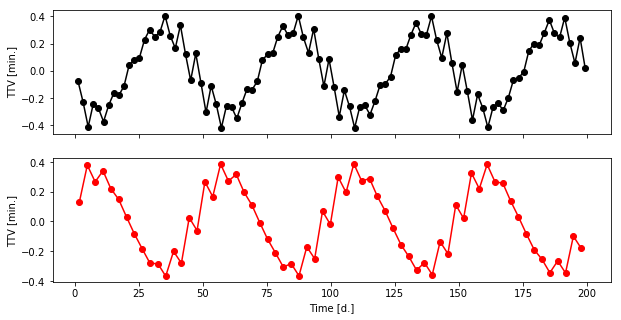

In [10]:
TransitTimes = M.dot(X)
TTV = M[:,2:].dot(X[2:])

TransitTimes1 = M1.dot(X1)
TTV1 = M1[:,2:].dot(X1[2:])


fig,ax=plt.subplots(2,1,sharex=True,figsize=(10,5))
ax[0].plot(TransitTimes,24*60*TTV,'ko-')
ax[1].plot(TransitTimes1,24*60*TTV1,'ro-')
ax[1].set_xlabel("Time [d.]")

ax[0].set_ylabel("TTV [min.]")
ax[1].set_ylabel("TTV [min.]")


# "analytic_ttv"

# Here is a 3-planet example

In [10]:
m1,m2,m3 = 2.e-5,2.e-5,3.e-5 # masses, in solar masses
P1 =  2 # inner planet period
P2= (3/2.)*(1+0.02)*P1 # outer planet period
P3= (3/2.)*(1-0.025)*P2 # outer planet period
tfin=150. * P1 # get transit times from 0 to tfin
e1,e2,e3 = 0.03,0.02,0.04 # eccentricities
varpi1,varpi2,varpi3 = np.random.uniform(0,2*np.pi,3)
T01, T02, T03 = 1.3, 1.9, 3.1 # initial times of transit
Ntransits1= 100 # number of transits to compute
Ntransits2=int(round(P1*Ntransits1/P2))
Ntransits3=int(round(P1*Ntransits1/P3))

Periods=[P1,P2,P3]
T0s=[T01, T02, T03]
Ntransits=[Ntransits1,Ntransits2,Ntransits3]
masses=[m1,m2,m3]
eccs=[e1,e2,e3]
varpis=[varpi1,varpi2,varpi3]


In [11]:
IMtrx=np.ones((3,3),dtype=bool)
#IMtrx[1,0]=0
A1,A2,A3=MultiplanetSystemBasisFunctionMatrices(3,Periods,T0s,Ntransits,InteractionMatrix=IMtrx)
X1,X2,X3=MultiplanetSystemLinearModelAmplitudes(3,Periods,T0s,masses,eccs,varpis,InteractionMatrix=IMtrx)

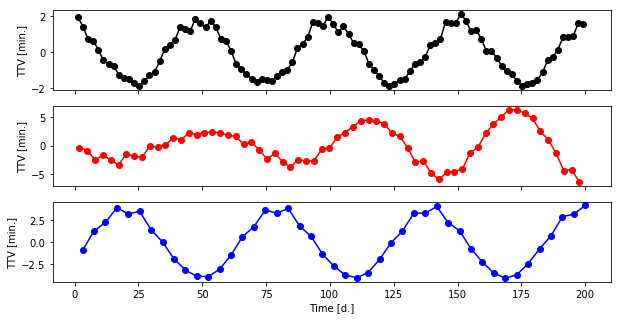

In [12]:
TransitTimes1 = A1.dot(X1)
TTV1 = A1[:,2:].dot(X1[2:])

TransitTimes2 = A2.dot(X2)
TTV2 = A2[:,2:].dot(X2[2:])

TransitTimes3 = A3.dot(X3)
TTV3 = A3[:,2:].dot(X3[2:])

fig,ax=plt.subplots(3,1,sharex=True,figsize=(10,5))
ax[0].plot(TransitTimes1,24*60*TTV1,'ko-')
ax[1].plot(TransitTimes2,24*60*TTV2,'ro-')
ax[2].plot(TransitTimes3,24*60*TTV3,'bo-')



ax[0].set_ylabel("TTV [min.]")
ax[1].set_ylabel("TTV [min.]")
ax[2].set_ylabel("TTV [min.]")


ax[2].set_xlabel("Time [d.]")



# Here is the same 3-planet example done with N-body

## you can clone PyTTVFast from https://github.com/shadden/PyTTVFast
## just go into the directory, 'make', and make sure to insert the install directory in python's path (sys.path.insert below)

In [13]:
import sys
#sys.path.insert(0, '/home/shadden/Projects/03_TESS_TTV/PyTTVFast')
sys.path.insert(0, '/Users/shadden/Projects/03_TESS_TTV/PyTTVFast')
import PyTTVFast
ttv=PyTTVFast.TTVCompute()

RAD2DEG=180/np.pi
NBvarpis = np.mod(np.array(varpis) * RAD2DEG + 90.0,360.0)
MVals = np.mod((-2*np.pi * np.array(T0s) / np.array(Periods)) * RAD2DEG + 90.0 - NBvarpis , 360)
params=np.vstack((masses,Periods,np.array(eccs),90*np.ones(3),np.zeros(3),NBvarpis,MVals)).T
times,success=ttv.TransitTimes(tfin,params)


On Quest...


/Users/shadden/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


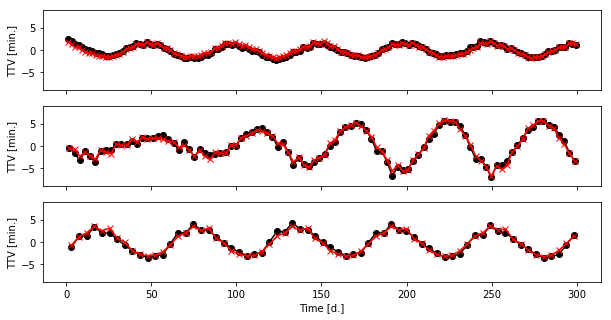

In [15]:
NBPeriods,NBT0s=np.array(list(map(lambda x: np.polyfit(np.arange(len(x)),x,1),times))).T
Ntransits = [len(t) for t in times]
Niter=1
for k in range(Niter):
    A=MultiplanetSystemBasisFunctionMatrices(3,NBPeriods,NBT0s,Ntransits,InteractionMatrix=IMtrx)
    solns=np.array([np.linalg.lstsq(A[i],times[i])[0] for i in range(3)])
    NBT0s,NBPeriods = solns.T[:2]
      
fig,ax=plt.subplots(3,1,sharex=True,figsize=(10,5))
for i in range(3):
    Ni = np.arange(len(times[i]))
    TTVi = times[i]-NBPeriods[i]*Ni-NBT0s[i]
    Atimesi = A[i].dot(solns[i])
    ATTVi = A[i][:,2:].dot(solns[i][2:])
    
    ax[i].plot(times[i],24*60*(TTVi),'ko-')
    ax[i].plot(Atimesi,24*60*(ATTVi),'rx-')
    
    ax[i].set_ylabel("TTV [min.]")
    ax[i].set_ylim(-9,9)

ax[2].set_xlabel("Time [d.]")

